# Load Data

In [1]:
from sklearn.datasets import fetch_openml
MNIST = fetch_openml('mnist_784', version=1)

# Explore Data

In [2]:
MNIST.keys()

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'DESCR', 'details', 'categories', 'url'])

In [3]:
import numpy as np
X, y= MNIST['data'], MNIST['target'].astype(np.uint8)
X.shape, y.shape #70,000 images and 784 pixels per image (i.e. 28 (w) x 28 (h) pixels 

((70000, 784), (70000,))

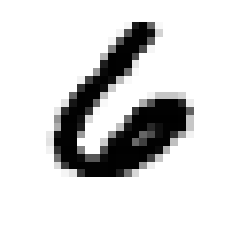

In [4]:
import matplotlib as mpl
import matplotlib.pyplot as plt
eg_digit = X[701]     #change this number to see other digits
eg_image = eg_digit.reshape(28, 28)

plt.imshow(eg_image, cmap='binary')
plt.axis('off')
plt.show()

In [5]:
y[701]                      #y is a label and is a string so convert it to integer using np

6

In [6]:
import numpy as np 
y = y.astype(np.uint8)
y[90]

6

# Prepare the Data

The data is already shuffled in MNIST so we do not need to shuffle it again. 

But we do need to scale it using Standard Scaler.

In [7]:
X_train = X[:60000]
X_test = X[60000:]

y_train = y[:60000]
y_test = y[60000:]

In [8]:
from sklearn.preprocessing import StandardScaler

# I have Memory Issues when i try this call, this will help your MNIST classifier massively. 

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.astype(np.float32))
X_test_scaled = scaler.transform(X_test.astype(np.float32))

# Model Selection

This case we are only using Linear SVC.

Linear SVC is a one verses the rest classifier so we don't have to do anything more then calling it. 

In [9]:
from sklearn.svm import LinearSVC

lin_clf = LinearSVC(random_state=42)
lin_clf.fit(X_train, y_train)

KeyboardInterrupt: 

### Assess Accuracy of model

In [ ]:
from sklearn.metrics import accuracy_score

y_pred = lin_clf.predict(X_train)
accuracy_score(y_train, y_pred)    

In [ ]:
#Multiple classification of data set using SVM or SGD (note. you may experience memory problems.)

# from sklearn.svm import SVC

svm_clf = SVC()
svm_clf.fit(X_train[:20000], y_train[:20000])

# from sklearn.linear_model import SGDClassifier

# sgd_class = SGDClassifier(random_state=42)
# sgd_class.fit(X_train[:1000], y_train[:1000])




In [ ]:
svm_clf.classes_

In [ ]:
svm_clf.decision_function([X[0]])#confidence that this is a 5 is not as high as expected, but this could be due to the reduced
#data set, because of memory.

In [ ]:
from sklearn.model_selection import cross_val_score


cross_val_score(svm_clf, X_train[:20000], y_train[:20000], cv=3, scoring= 'accuracy')

In [ ]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
y_pred_values = cross_val_predict(svm_clf, X_train[:20000], y_train[:20000], cv=3)
conf_mx = confusion_matrix(y_train[:20000], y_pred_values)
conf_mx

In [ ]:
import matplotlib.pyplot as plt
plt.matshow(conf_mx, cmap= plt.cm.gray)
plt.show()

In [ ]:
row_sums = conf_mx.sum(axis=1, keepdims=True)
norm_conf_mx  = conf_mx/row_sums

np.fill_diagonal(norm_conf_mx, 0)
plt.matshow(norm_conf_mx, cmap=plt.cm.gray)
plt.show()

In [ ]:
#Shifting you images by a few pixels can increase accuracy ! This is called data augmentation.
from scipy.ndimage.interpolation import shift
def shift_image(image, dx, dy):
    image = image.reshape((28, 28))
    shifted_image = shift(image, [dy, dx], cval=0, mode="constant")
    return shifted_image.reshape([-1])

image = X_train[1000]
shifted_image_down = shift_image(image, 0, 5)
shifted_image_left = shift_image(image, -5, 0)

plt.figure(figsize=(12,3))
plt.subplot(131)
plt.title("Original", fontsize=14)
plt.imshow(image.reshape(28, 28), interpolation="nearest", cmap="Greys")
plt.subplot(132)
plt.title("Shifted down", fontsize=14)
plt.imshow(shifted_image_down.reshape(28, 28), interpolation="nearest", cmap="Greys")
plt.subplot(133)
plt.title("Shifted left", fontsize=14)
plt.imshow(shifted_image_left.reshape(28, 28), interpolation="nearest", cmap="Greys")
plt.show()

In [ ]:
X_train_augmented = [image for image in X_train]
y_train_augmented = [label for label in y_train]

for dx, dy in ((1, 0), (-1, 0), (0, 1), (0, -1)):
    for image, label in zip(X_train, y_train):
        X_train_augmented.append(shift_image(image, dx, dy))
        y_train_augmented.append(label)

X_train_augmented = np.array(X_train_augmented)
y_train_augmented = np.array(y_train_augmented)

shuffle_idx = np.random.permutation(len(X_train_augmented))
X_train_augmented = X_train_augmented[shuffle_idx]
y_train_augmented = y_train_augmented[shuffle_idx]